In [1]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
features_cnv_df = pd.read_csv("../../data/cnv_df_128.csv")
features_gene_df = pd.read_csv("../../data/gene_df_128.csv")
label_df = pd.read_csv("../../data/final_labels.csv")

In [3]:
features_cnv_df = features_cnv_df.merge(label_df[['Case_ID_Final','File ID']], left_on='file_name',right_on = 'File ID', how = 'left')
features_cnv_df.drop(columns=['File ID','file_name'],inplace = True)

In [4]:
features_gene_df = features_gene_df.merge(label_df[['Case_ID_Final','File ID']], left_on='file_name',right_on = 'File ID', how = 'left')
features_gene_df.drop(columns=['File ID','file_name'],inplace = True)

In [5]:
features_cnv_df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Case_ID_Final
0,-0.974156,0.640870,0.954011,-0.290834,-0.895645,0.305227,-0.743481,-0.722786,0.743691,-0.768662,...,-0.282916,1.046016,-0.897457,-1.595210,-0.421787,0.261736,-0.015702,-0.602377,-1.009496,TCGA-33-4582
1,-1.076514,-0.841759,-0.723073,0.847657,-0.414650,-0.830574,-0.743481,-0.722786,-0.757991,-0.768662,...,-0.673909,0.462093,-0.897457,-0.223368,-1.191027,2.811174,0.781487,2.521043,1.981540,TCGA-LA-A7SW
2,0.795264,-0.361459,0.818655,0.453412,-0.448078,-0.830574,-0.743481,-0.722786,1.411721,-0.768662,...,-0.036675,0.525036,-0.897457,-0.325024,0.273792,1.294912,-0.440448,-0.602377,1.385616,TCGA-43-5670
3,-1.096501,-0.841759,-0.723073,-0.602058,-0.959978,-0.830574,0.493545,-0.722786,-0.564996,0.240910,...,-0.673909,-0.307242,-0.132606,-0.015206,-0.577474,-0.834728,-0.509095,0.683812,-1.009496,TCGA-21-5782
4,-1.246765,-0.841759,-0.723073,-0.798074,-1.634691,-0.830574,-0.743481,-0.722786,-0.937965,0.238429,...,-0.673909,-1.114877,0.265582,-0.279157,-0.565246,-0.834728,-0.509095,-0.602377,-1.009496,TCGA-22-4601


In [6]:
features_gene_df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Case_ID_Final
0,-0.582455,-0.701758,-0.640041,-0.651243,-0.515404,-0.495131,-0.517379,0.588646,1.863894,-0.621916,...,-0.542616,-0.228780,-0.752959,0.219008,0.072883,-0.592596,1.412789,0.309494,-0.453034,TCGA-NC-A5HJ
1,0.524985,-0.701758,-0.570597,-0.651243,-0.502745,-0.567748,-0.517379,0.496048,0.408932,-0.586124,...,-0.278106,-0.617647,-0.752959,-0.714272,-0.146005,-0.592596,-0.440188,-0.172580,-0.453034,TCGA-38-4629
2,-0.582455,-0.701758,-0.708642,1.080668,-0.108780,-0.567748,-0.517379,0.522610,1.562211,1.541681,...,-0.542616,-0.617647,0.659960,-0.714272,-0.541447,-0.592596,-0.440188,-0.563508,-0.453034,TCGA-22-1012
3,-0.582455,-0.701758,-0.708642,-0.651243,0.383334,-0.567748,-0.517379,0.747961,-0.877069,-0.740916,...,-0.542616,-0.617647,-0.439350,-0.714272,-0.541447,-0.368792,-0.440188,-0.563508,-0.453034,TCGA-18-5592
4,-0.582455,-0.701758,-0.575235,-0.361519,-0.559405,-0.049738,-0.517379,-0.508362,-0.064147,0.009734,...,-0.542616,-0.577881,0.292234,0.232081,-0.541447,-0.592596,0.329495,-0.563508,-0.453034,TCGA-39-5035


In [7]:
features_df = pd.merge(left = features_cnv_df,right=features_gene_df, on='Case_ID_Final')
cases = features_df.pop('Case_ID_Final')
features_df.insert(0,'case_id',cases)

In [8]:
features_df

,case_id,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,118_y,119_y,120_y,121_y,122_y,123_y,124_y,125_y,126_y,127_y
0,TCGA-33-4582,-0.974156,0.640870,0.954011,-0.290834,-0.895645,0.305227,-0.743481,-0.722786,0.743691,...,-0.584980,0.185958,-0.617647,2.055753,0.240046,-0.541447,-0.592596,-0.440188,-0.563508,-0.453034
1,TCGA-LA-A7SW,-1.076514,-0.841759,-0.723073,0.847657,-0.414650,-0.830574,-0.743481,-0.722786,-0.757991,...,3.926138,-0.542616,-0.617647,-0.618597,-0.714272,0.892402,-0.592596,-0.440188,-0.563508,2.586820
2,TCGA-43-5670,0.795264,-0.361459,0.818655,0.453412,-0.448078,-0.830574,-0.743481,-0.722786,1.411721,...,4.247496,-0.542616,-0.617647,1.695843,-0.057618,-0.541447,-0.592596,-0.440188,-0.563508,-0.453034
3,TCGA-21-5782,-1.096501,-0.841759,-0.723073,-0.602058,-0.959978,-0.830574,0.493545,-0.722786,-0.564996,...,-0.774314,7.550358,8.774622,2.601496,-0.714272,-0.541447,-0.592596,-0.440188,-0.563508,-0.453034
4,TCGA-22-4601,-1.246765,-0.841759,-0.723073,-0.798074,-1.634691,-0.830574,-0.743481,-0.722786,-0.937965,...,-0.774314,-0.234228,-0.617647,0.389180,-0.714272,-0.541447,-0.592596,-0.440188,-0.563508,0.691337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,TCGA-58-8388,-1.117414,-0.841759,-0.723073,-0.407473,-0.175871,-0.830574,0.208899,-0.722786,-0.937965,...,0.077757,-0.542616,-0.617647,1.142332,-0.714272,-0.541447,-0.592596,0.096658,-0.563508,3.300766
950,TCGA-77-A5GB,-0.518656,-0.841759,-0.723073,-0.802269,-0.282307,-0.830574,-0.004733,-0.722786,-0.683462,...,1.076117,-0.542616,-0.617647,-0.752959,-0.714272,-0.335625,-0.336252,-0.243500,-0.563508,-0.453034
951,TCGA-55-6543,-0.360635,0.209288,-0.723073,-0.802269,-0.998645,-0.793644,-0.743481,-0.722786,0.008906,...,-0.181656,-0.542616,-0.184618,-0.580952,-0.009484,1.511292,0.393623,-0.440188,0.049353,-0.453034
952,TCGA-77-A5G3,2.197401,1.283121,1.496612,1.100107,1.182862,1.571816,-0.743481,-0.722786,0.987761,...,-0.774314,-0.542616,-0.617647,1.051888,-0.714272,-0.541447,-0.592596,-0.440188,-0.563508,0.916693


In [9]:
label_df_2 = label_df.groupby(['Case_ID_Final','LABEL','final_label','Project ID']).agg({'File ID':'nunique'}).reset_index()
label_df_2.index = label_df_2['Case_ID_Final']
label_df_2

,Case_ID_Final,LABEL,final_label,Project ID,File ID
Case_ID_Final,,,,,
TCGA-05-4244,TCGA-05-4244,ALC,"Adenocarcinoma, NOS",TCGA-LUAD,2
TCGA-05-4249,TCGA-05-4249,ALC,"Adenocarcinoma, NOS",TCGA-LUAD,2
TCGA-05-4250,TCGA-05-4250,ALC,"Adenocarcinoma, NOS",TCGA-LUAD,2
TCGA-05-4382,TCGA-05-4382,ALC,Adenocarcinoma with mixed subtypes,TCGA-LUAD,2
TCGA-05-4384,TCGA-05-4384,ALC,Adenocarcinoma with mixed subtypes,TCGA-LUAD,2
...,...,...,...,...,...
TCGA-O2-A52V,TCGA-O2-A52V,SCLC,"Squamous cell carcinoma, NOS",TCGA-LUSC,2
TCGA-O2-A52W,TCGA-O2-A52W,SCLC,"Squamous cell carcinoma, NOS",TCGA-LUSC,2
TCGA-O2-A5IB,TCGA-O2-A5IB,SCLC,"Squamous cell carcinoma, NOS",TCGA-LUSC,2


In [10]:
labels = label_df_2.loc[features_df['case_id']]['LABEL']
labels_more = label_df_2.loc[features_df['case_id']]['final_label']
projects = label_df_2.loc[features_df['case_id']]['Project ID']

### Using t-SNE 

/Users/arnavgupta/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/arnavgupta/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 954 samples in 0.000s...
[t-SNE] Computed neighbors for 954 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 954 / 954
[t-SNE] Mean sigma: 3.955448
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.813087
[t-SNE] KL divergence after 1000 iterations: 1.307884


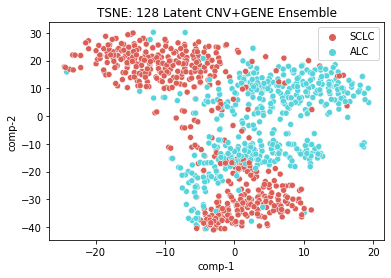

In [11]:
X = features_df.iloc[:,1:]
Y = labels
tsne = TSNE(n_components=2, verbose=1, random_state=13)
z = tsne.fit_transform(X)
df = pd.DataFrame()
df["y"] = Y
df["y_more"] = labels_more
df["projects"] = projects
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]


pt1 = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df)
pt1.set(title="TSNE: 128 Latent CNV+GENE Ensemble")
pt1.get_figure().savefig("../../Figures/tsne_cnv_gene_ensemble_1.png")

## Using PCA

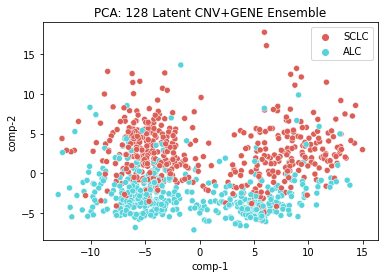

In [12]:
X = features_df.iloc[:,1:]
Y = labels
pca = PCA(n_components=2)
z = pca.fit_transform(X)
df = pd.DataFrame()
df["y"] = Y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

pt1 = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df)
pt1.set(title="PCA: 128 Latent CNV+GENE Ensemble")
pt1.get_figure().savefig("../../Figures/pca_cnv_gene_ensemble.png")

In [13]:
pca.explained_variance_ratio_.cumsum()

array([0.20667398, 0.28853522])

## 10 fold cross validation

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from mlmodels import cross_validate_custom

In [14]:
VC = VotingClassifier(estimators=[('SVM', SVC(kernel = 'rbf', probability=True)),
 ('RF', RandomForestClassifier(n_estimators=100))],voting='soft')
estimators = [SVC(kernel='rbf',probability=True), RandomForestClassifier(n_estimators=100),VC]

In [15]:
result = []
for estimator in estimators:
    result.append(cross_validate_custom(X,Y,estimator))
result = pd.DataFrame(result,index = ['SVM','RF','Voting'])
result


,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std,roc_auc_mean,roc_auc_std
SVM,0.950691,0.030114,0.951321,0.029412,0.951219,0.029934,0.950667,0.030133,0.980463,0.017241
RF,0.944419,0.027436,0.945126,0.026664,0.944877,0.027349,0.944380,0.027468,0.980456,0.007763
Voting,0.945450,0.028157,0.945769,0.028038,0.945675,0.028083,0.945412,0.028168,0.981812,0.010136
